In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
import os
import cv2

path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem1/ML/archive/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor':2,'meningioma_tumor':3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


<Axes: >

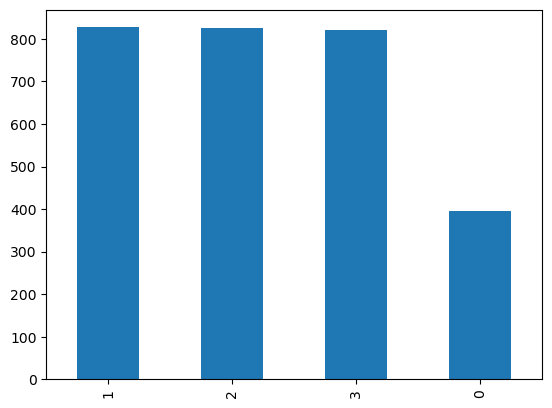

In [25]:

X = np.array(X)
Y = np.array(Y)
pd.Series(Y).value_counts().plot(kind="bar")

In [10]:
X_updated = X.reshape(len(X), -1)
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

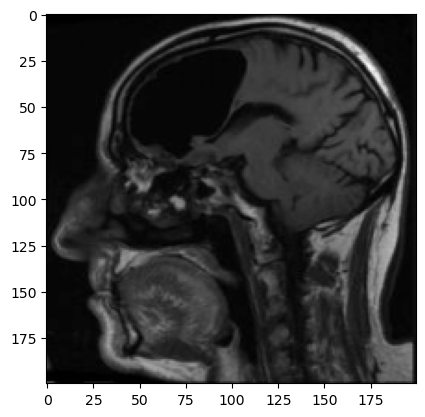

In [11]:
plt.imshow(X[0], cmap='gray')

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [14]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [16]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [28]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(xtrain, ytrain)

SVC(kernel='linear')

In [29]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8257839721254355


In [30]:
pred = sv.predict(xtest)
misclassified=np.where(ytest!=pred)
misclassified

(array([  1,   6,   8,  14,  15,  16,  26,  31,  32,  37,  47,  56,  72,
         76,  77,  82,  84,  97, 104, 109, 113, 124, 130, 142, 145, 160,
        166, 169, 171, 179, 185, 187, 204, 207, 216, 218, 228, 229, 230,
        232, 239, 245, 248, 249, 252, 253, 255, 257, 261, 274, 275, 283,
        286, 296, 299, 309, 315, 317, 326, 330, 335, 356, 366, 373, 376,
        377, 378, 379, 386, 389, 396, 424, 434, 435, 440, 453, 460, 465,
        466, 468, 471, 475, 483, 485, 489, 490, 491, 496, 500, 504, 509,
        516, 524, 529, 538, 541, 546, 551, 555, 568]),)

In [31]:
dec = {0:'No Tumor', 1:'Pituitary Tumor',2:'Glioma Tumor',3:'Meningioma Tumor'}

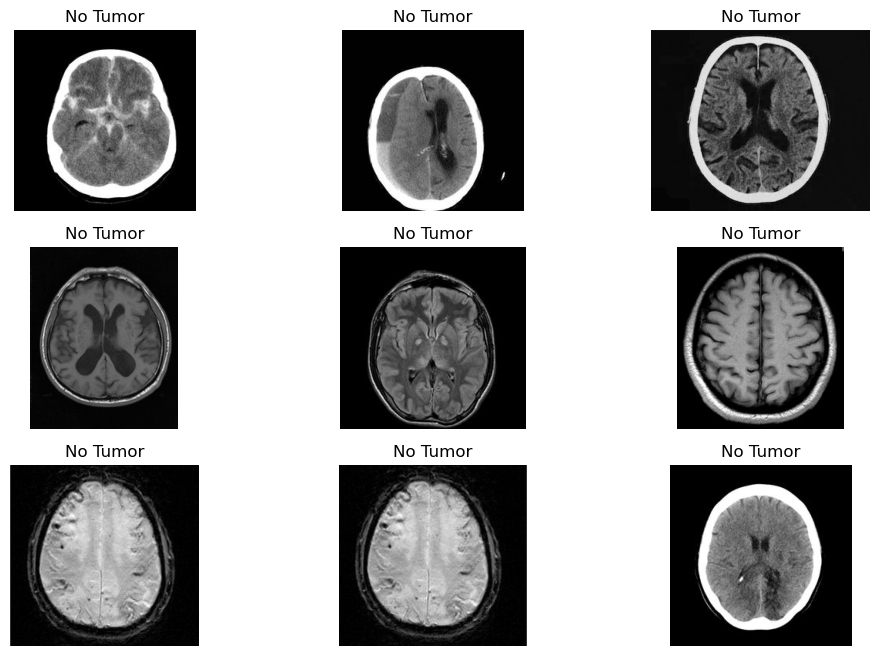

In [32]:
plt.figure(figsize=(12,8))
c=1
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem1/ML/archive/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

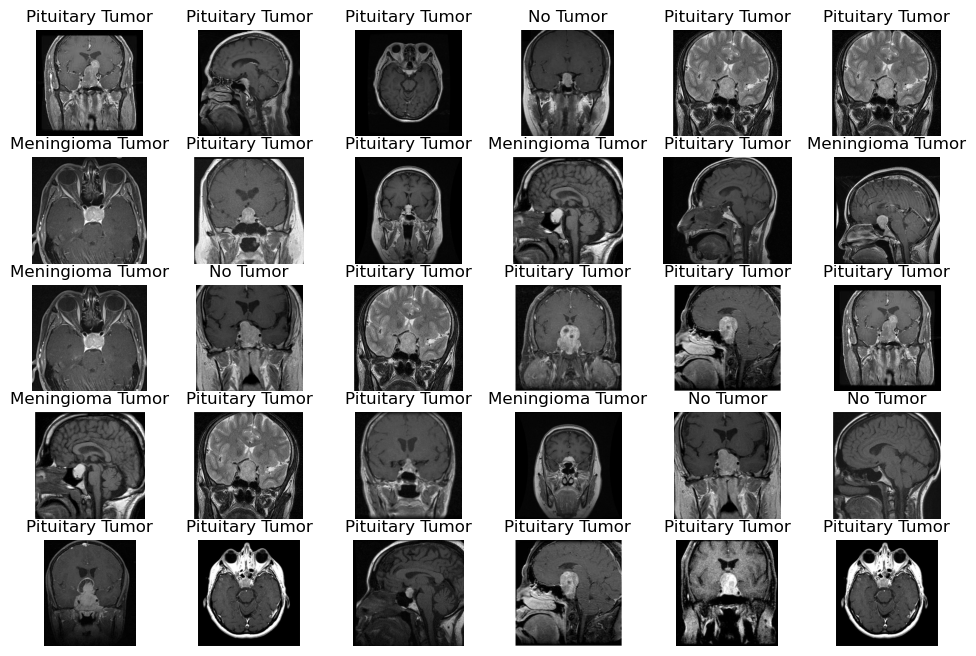

In [33]:
plt.figure(figsize=(12,8))
c=1
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem1/ML/archive/Testing/pituitary_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

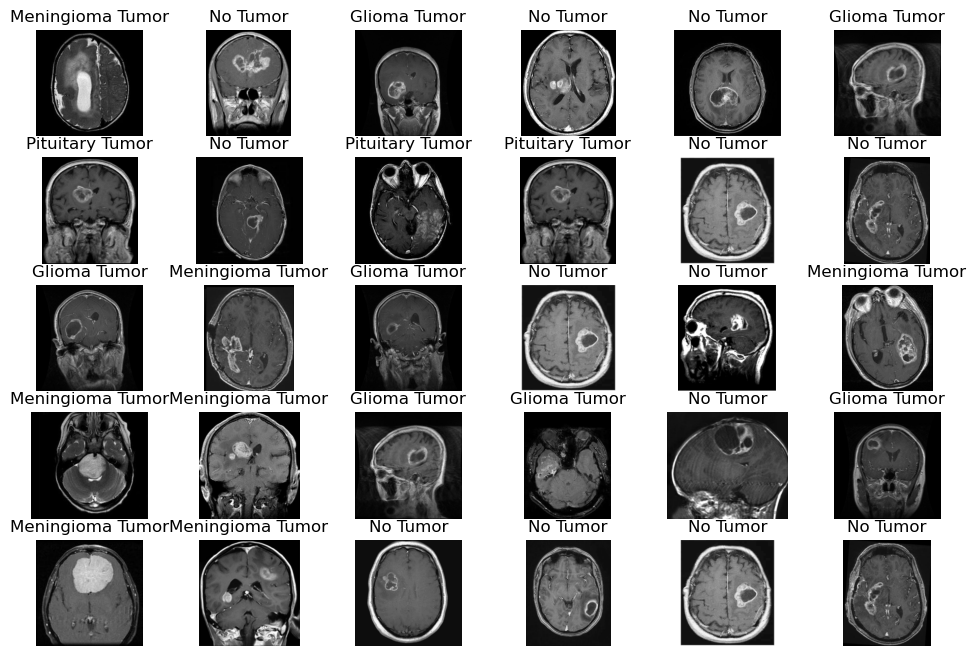

In [34]:
plt.figure(figsize=(12,8))
c=1
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem1/ML/archive/Testing/glioma_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

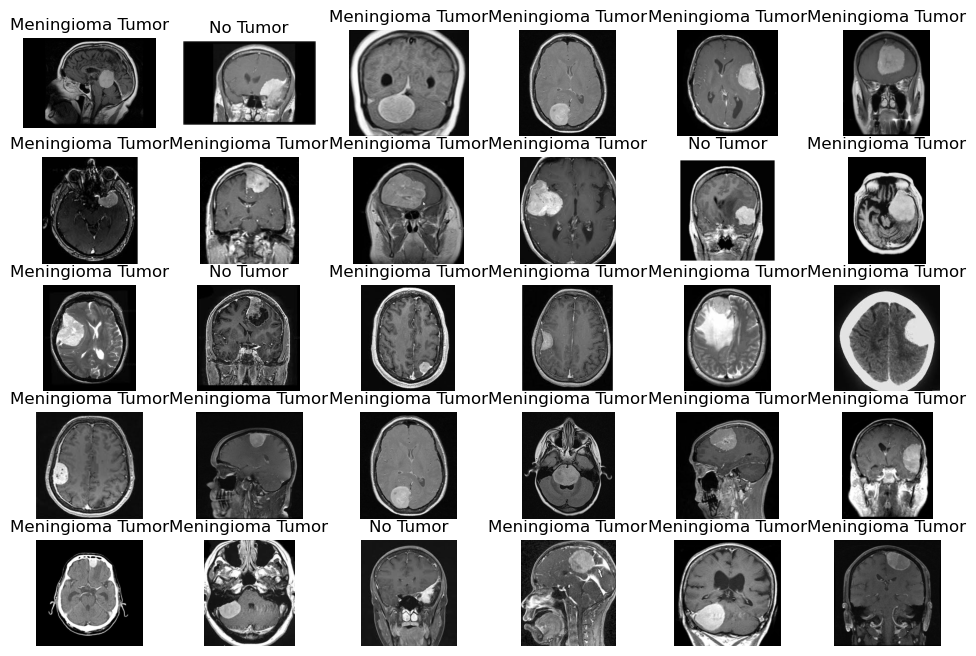

In [35]:
plt.figure(figsize=(12,8))
c=1
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem1/ML/archive/Testing/meningioma_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

In [39]:
from sklearn.metrics import classification_report
classification=classification_report(ytest,pred)
print(classification)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        91
           1       0.90      0.96      0.93       162
           2       0.81      0.83      0.82       145
           3       0.78      0.74      0.76       176

    accuracy                           0.83       574
   macro avg       0.82      0.82      0.82       574
weighted avg       0.82      0.83      0.82       574



In [40]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(ytest,pred)
matrix

array([[ 68,   9,   3,  11],
       [  1, 155,   1,   5],
       [  2,   3, 120,  20],
       [ 15,   5,  25, 131]])

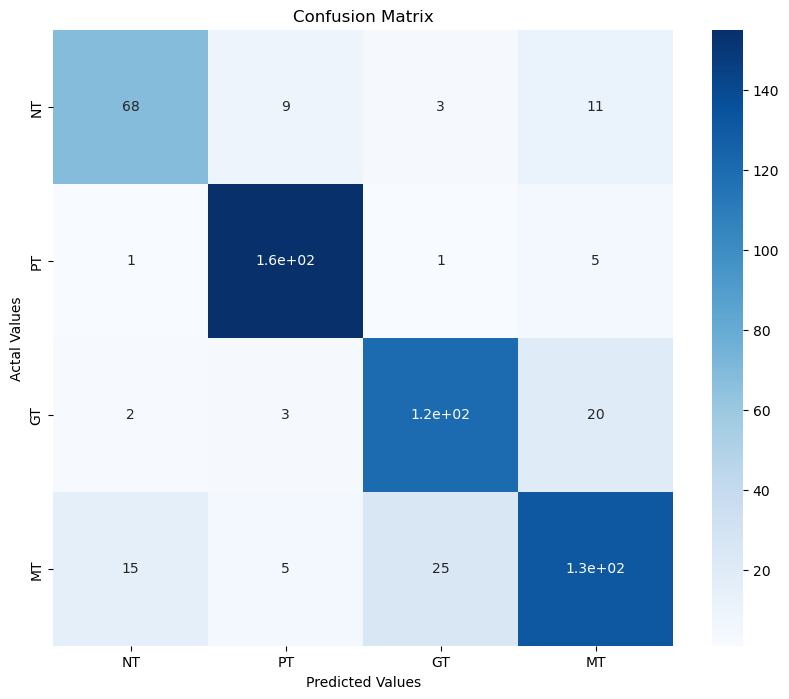

In [52]:
cm_df = pd.DataFrame(matrix,
                     index = ['NT','PT','GT','MT'], 
                     columns = ['NT','PT','GT','MT'])
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()